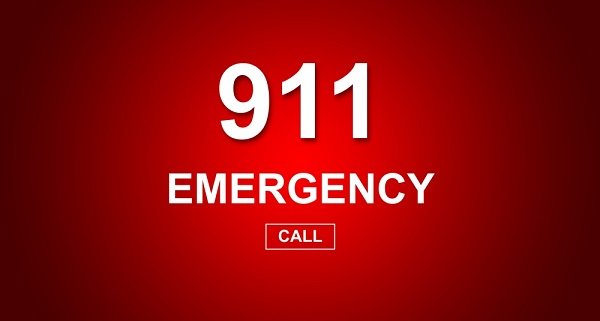


# 911 Calls Project

911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


 Importing libraries

In [3]:
import numpy as np
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the CSV file and doing some exploratory analysis

In [19]:
df=pd.read_csv('911.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634774 entries, 0 to 634773
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        634774 non-null  float64
 1   lng        634774 non-null  float64
 2   desc       634774 non-null  object 
 3   zip        557625 non-null  float64
 4   title      634774 non-null  object 
 5   timeStamp  634774 non-null  object 
 6   twp        634502 non-null  object 
 7   addr       634774 non-null  object 
 8   e          634774 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.6+ MB


In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 zipcodes for 911 calls

In [73]:
df['zip'].value_counts().head(5)

197

Top 5 townships for 911 calls

In [36]:
df['twp'].value_counts().head(5)

LOWER MERION    53313
ABINGTON        38271
NORRISTOWN      35778
UPPER MERION    34569
CHELTENHAM      29289
Name: twp, dtype: int64

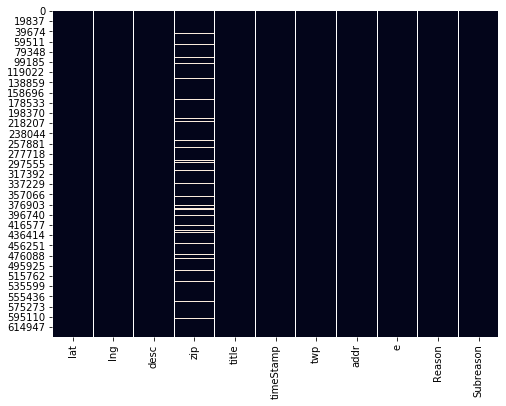

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False)

Zip code has many null values but we have lat, long from each call

Creating a column for reason and another for subreason of 911 call.

In [37]:
df['title'][0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [38]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])
df['Subreason']=df['title'].apply(lambda x: x.split(':')[1])

Most common reasons and subreasons for a 911 call

In [39]:
df['Reason'].value_counts()

EMS        317346
Traffic    222192
Fire        95236
Name: Reason, dtype: int64

In [95]:
df['Subreason'].value_counts().head(20)

 VEHICLE ACCIDENT -           144071
 DISABLED VEHICLE -            46342
 FIRE ALARM                    36534
 VEHICLE ACCIDENT              35042
 FALL VICTIM                   32837
 RESPIRATORY EMERGENCY         32734
 CARDIAC EMERGENCY             31084
 ROAD OBSTRUCTION -            21494
 SUBJECT IN PAIN               18781
 HEAD INJURY                   17404
 GENERAL WEAKNESS              11254
 SYNCOPAL EPISODE              10396
 SEIZURES                      10362
 UNKNOWN MEDICAL EMERGENCY     10173
 MEDICAL ALERT ALARM            9808
 ALTERED MENTAL STATUS          9602
 FIRE INVESTIGATION             9017
 ABDOMINAL PAINS                8642
 UNCONSCIOUS SUBJECT            8306
 OVERDOSE                       7921
Name: Subreason, dtype: int64

We can remove that '-' from Vehicle accident with a function

In [94]:
def cleandata(parameter):
    if parameter=='VEHICLE ACCIDENT -':
        return parameter.rstrip('-')
    else:
        return parameter
    
df['Subreason']=df['Subreason'].apply(lambda x: cleandata(x))

We can see the most common reason is emergency for vehicle accident. Lets create some visualizations

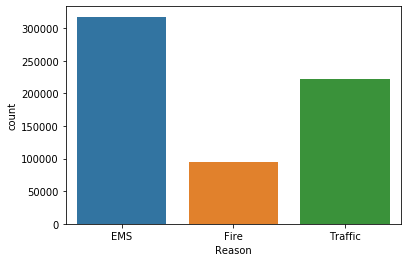

In [96]:
sns.countplot(x='Reason', data=df)

In [106]:
df['station'] = df.desc.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Subreason,station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,329


<BarContainer object of 10 artists>

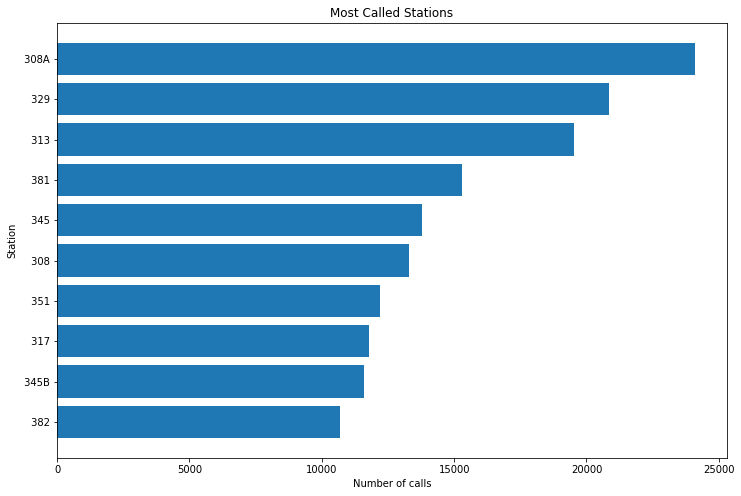

In [108]:
station = df.station.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(station.index)
y = list(station.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

plt.barh(x, y)

Converting the timeStamp column into DateTime Object.

In [45]:
type(df['timeStamp'].iloc[0])

str

In [46]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

Now we can create new three columns with hour, Month and day of the week.

In [122]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [123]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [124]:
df['Day of the Week'] = df['timeStamp'].apply(lambda x: x.weekday())

In [125]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of the Week'] = df['Day of the Week'].map(dmap)

Now we can use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

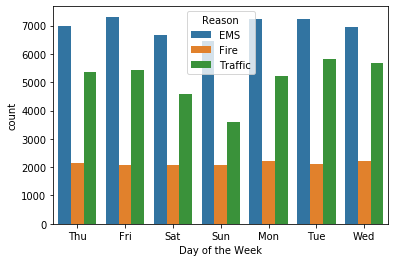

In [97]:
sns.countplot(df['Day of the Week'], hue=df['Reason'])

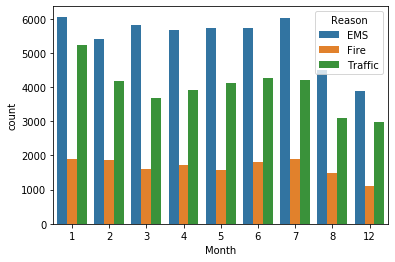

In [99]:
sns.countplot(df['Month'], hue=df['Reason'])

We can see that some months are missing

In [126]:
byMonth=df.groupby('Month').count().reset_index()
byMonth

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Subreason,station,Date,Hour,Day of the Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,40057,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,36421,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,39124,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,36617,53671,53671,53671
4,5,50563,50563,50563,44128,50563,50563,50538,50563,50563,50563,50563,32869,50563,50563,50563
5,6,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,31221,48493,48493,48493
6,7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,32425,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,32008,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,31240,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,32708,51240,51240,51240


Now we can create a simple plot off of the dataframe indicating the count of calls per month.

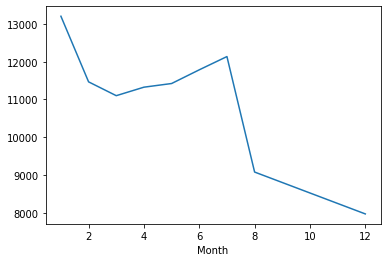

In [122]:
byMonth['lat'].plot()


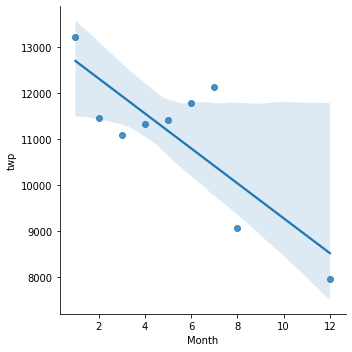

In [138]:
sns.lmplot(x='Month',y='twp',data=byMonth)

Now we create a column with the date from timestamp

In [127]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

Countplot of calls per date

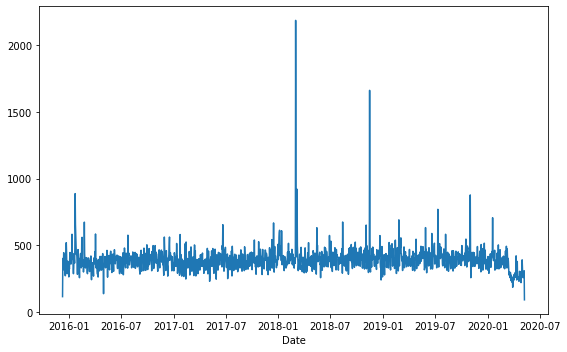

In [128]:
plt.figure(figsize=(8,5))
df.groupby('Date').count()['title'].plot()
plt.tight_layout()

We can make 3 separate plots with each plot representing a Reason for the 911 call

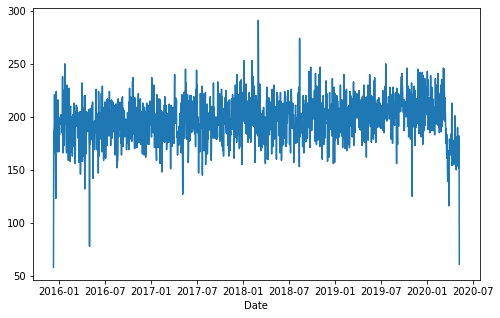

In [129]:
plt.figure(figsize=(8,5))
df[df['Reason']=='EMS'].groupby('Date').count()['title'].plot()

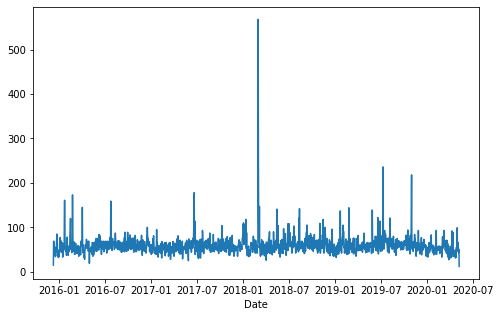

In [130]:
plt.figure(figsize=(8,5))
df[df['Reason']=='Fire'].groupby('Date').count()['title'].plot()

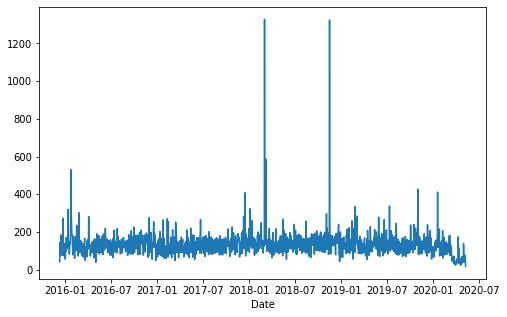

In [131]:
plt.figure(figsize=(8,5))
df[df['Reason']=='Traffic'].groupby('Date').count()['title'].plot()

We can create a pivot table with days of the week and hours as columns

In [133]:
hm=df.pivot_table( index='Day of the Week', columns='Hour', aggfunc='count')['Date']

In [134]:
df.groupby(['Day of the Week','Hour']).count().unstack(level=-1)['lat']


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the Week,,,,,,,,,,,,,,,,,,,,,
Fri,1895,1556,1382,1249,1268,1567,2581,4016,4865,5081,...,6095,6729,6798,6832,5421,4824,4161,3702,3265,2723
Mon,1806,1491,1304,1214,1280,1759,2587,4301,5336,5516,...,5413,5926,6086,6169,5215,4289,3606,3103,2549,1978
Sat,2322,1963,1811,1521,1383,1503,1801,2396,3313,4148,...,5174,4951,4992,4970,4780,4559,3955,3715,3072,2831
Sun,2322,2057,1867,1540,1413,1411,1661,2304,2891,3572,...,4514,4270,4344,4311,4199,3980,3562,2993,2486,2213
Thu,1633,1335,1351,1177,1206,1696,2707,4312,5147,5183,...,5821,6220,6124,6697,5307,4513,3916,3352,2716,2260
Tue,1632,1388,1267,1161,1192,1672,2690,4271,5437,5363,...,5670,6008,6220,6639,5412,4410,3679,3257,2579,2029
Wed,1587,1416,1209,1208,1071,1530,2565,4519,5304,5235,...,5684,6196,6483,6764,5433,4484,3924,3363,2683,2108


The heatmap can tell us which days and hours are the ones with the most calls

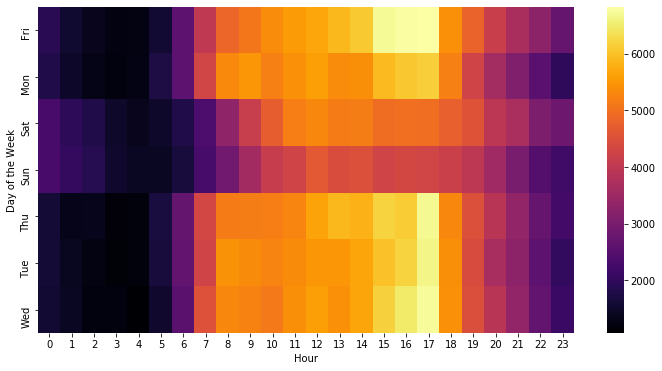

In [135]:
plt.figure(figsize=(12,6))
sns.heatmap(hm, cmap='inferno')

A clustermap can make this more noticeable

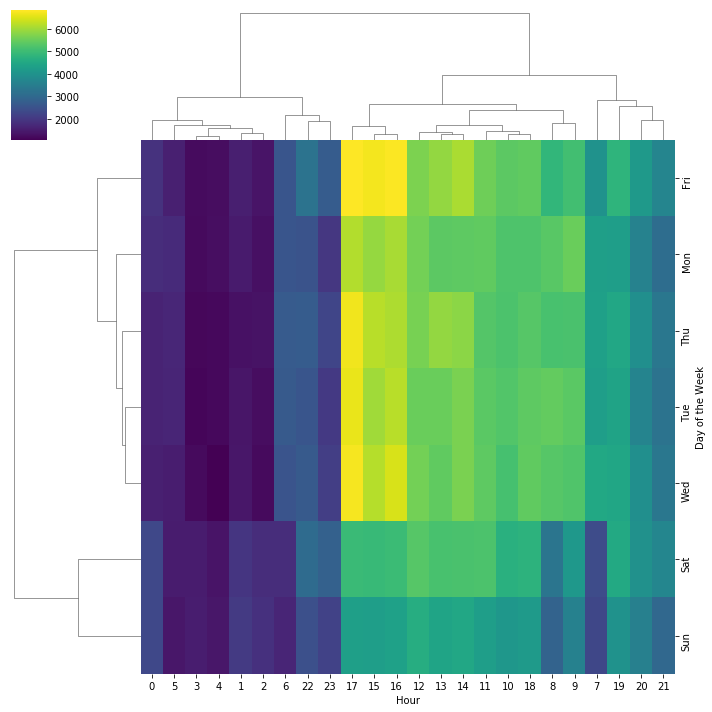

In [137]:
sns.clustermap(hm, cmap='viridis')

 Now we can do the same but with the Month as the column

In [142]:
hm2=df.groupby(['Day of the Week', 'Month']).count().unstack(level=-1)['Hour']

In [143]:
hm2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of the Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,7633,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7034,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,6068,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,5684,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,7832,7850,6964,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,8092,6689,7637,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,8220,7055,6976,7984,6844,7876,7410,7682


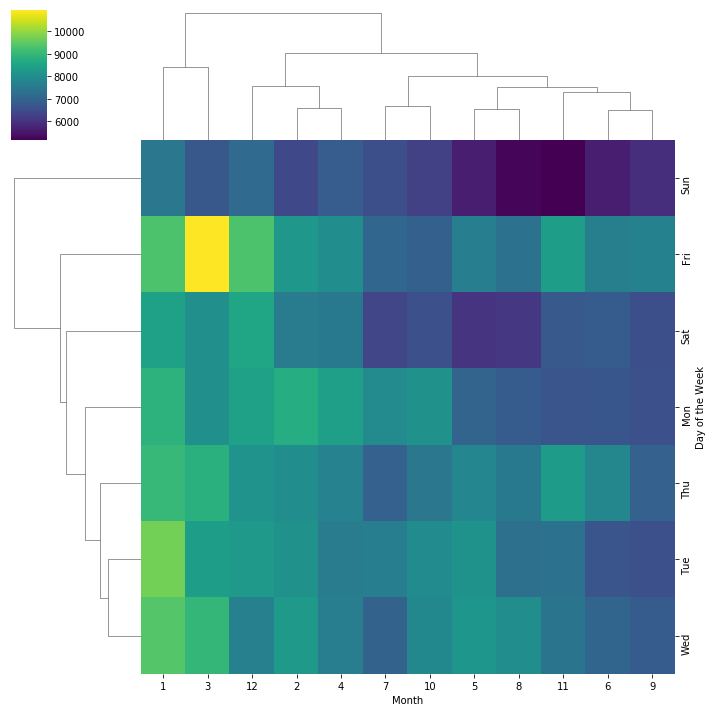

In [144]:
sns.clustermap(hm2, cmap='viridis')